In [1]:
import sys
print(sys.executable)

C:\Users\sleep\AppData\Local\Programs\Python\Python313\python.exe


In [2]:
!pip install tensorflow keras numpy matplotlib scikit-learn

^C


In [3]:
!pip install --no-cache-dir tensorflow keras numpy matplotlib scikit-learn


In [4]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("TensorFlow:", tf.__version__)
print("Keras:", keras.__version__)
print("NumPy:", np.__version__)


2025-11-15 19:53:28.845697: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-15 19:53:28.845899: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-15 19:53:28.871682: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-15 19:53:29.611319: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different compu

TensorFlow: 2.20.0
Keras: 3.12.0
NumPy: 2.3.4


In [5]:
# Load the CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

# Load data 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of test samples: 10000


/tmp/ipykernel_12527/2480943932.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = class_names[int(y_train[k])]


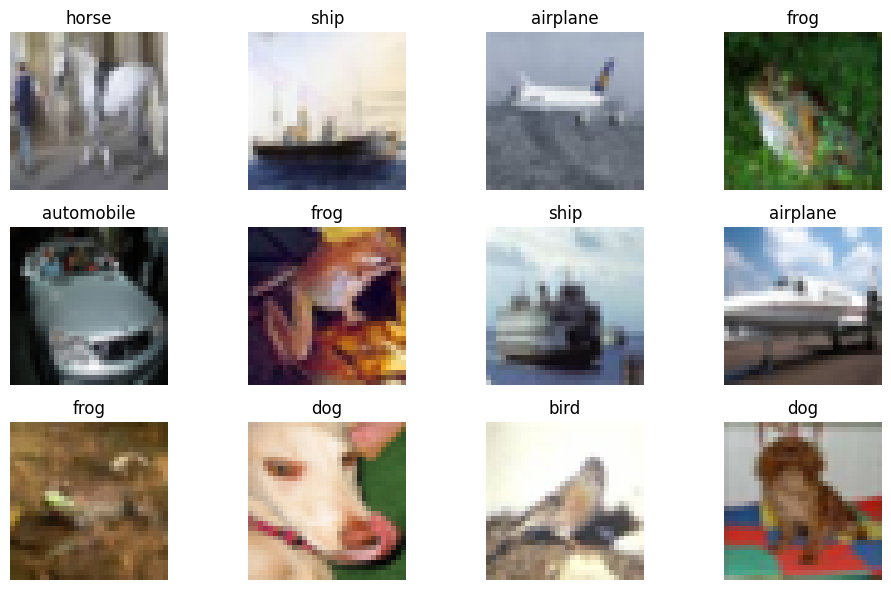

In [6]:
# Step 2: Inspect a few CIFAR-10 images (visual sanity check)

import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 class names in the canonical order
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Show 12 random training images with their labels
np.random.seed(42)
idx = np.random.choice(len(x_train), size=12, replace=False)

plt.figure(figsize=(10, 6))
for i, k in enumerate(idx, 1):
    plt.subplot(3, 4, i)
    plt.imshow(x_train[k])
    label = class_names[int(y_train[k])]
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
#  Normalize the data (convert pixel values to [0,1] range)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels from arrays to integers
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Data normalized. Example pixel value range:", x_train.min(), "to", x_train.max())
print("Labels converted to 1D arrays. Example:", y_train[:10])


Data normalized. Example pixel value range: 0.0 to 1.0
Labels converted to 1D arrays. Example: [6 9 9 4 1 1 2 7 8 3]


In [8]:
# Machine Learning baseline model (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [9]:
# Flatten 32x32x3 images into 1D vectors (3072 features)
X_train_flat = x_train.reshape((x_train.shape[0], -1))

In [10]:
X_test_flat = x_test.reshape((x_test.shape[0], -1))

In [11]:
# Scale the data (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [12]:
# 1. ML-Modell erstellen
# Wir erstellen eine Instanz des Logistic Regression Modells.
# 'max_iter=1000' gibt dem Modell mehr Zeit zum Trainieren, da der Datensatz groß ist.
from sklearn.linear_model import LogisticRegression
ml_model = LogisticRegression(max_iter=1000)

print("Starte Training des ML-Modells... (Das kann 1-2 Minuten dauern)")

# 2. Modell trainieren
# Wir trainieren das Modell mit den vorbereiteten (skalierten) Trainingsdaten.
ml_model.fit(X_train_scaled, y_train)

print("ML-Modell Training abgeschlossen.")

# 3. Vorhersagen machen
# Wir benutzen das trainierte Modell, um Vorhersagen für die Testdaten zu machen.
y_pred_ml = ml_model.predict(X_test_scaled)

print("Vorhersagen abgeschlossen.")

# 4. Ergebnisse auswerten
# Wir importieren die Tools, um die Genauigkeit zu messen
from sklearn.metrics import accuracy_score, classification_report

# Wir vergleichen die Vorhersagen (y_pred_ml) mit den echten Labels (y_test)
accuracy_ml = accuracy_score(y_test, y_pred_ml)
print(f"Genauigkeit (Accuracy) des ML-Modells: {accuracy_ml * 100:.2f}%")

# 5. Detaillierten Report anzeigen 
print("\nClassification Report (ML-Modell):")
# (class_names wurde in Zelle [6] definiert)
print(classification_report(y_test, y_pred_ml, target_names=class_names))

Starte Training des ML-Modells... (Das kann 1-2 Minuten dauern)
ML-Modell Training abgeschlossen.
Vorhersagen abgeschlossen.
Genauigkeit (Accuracy) des ML-Modells: 36.74%

Classification Report (ML-Modell):
              precision    recall  f1-score   support

    airplane       0.42      0.42      0.42      1000
  automobile       0.43      0.43      0.43      1000
        bird       0.28      0.27      0.27      1000
         cat       0.24      0.24      0.24      1000
        deer       0.33      0.29      0.31      1000
         dog       0.29      0.30      0.30      1000
        frog       0.39      0.42      0.40      1000
       horse       0.43      0.40      0.41      1000
        ship       0.45      0.51      0.48      1000
       truck       0.40      0.41      0.41      1000

    accuracy                           0.37     10000
   macro avg       0.37      0.37      0.37     10000
weighted avg       0.37      0.37      0.37     10000



/media/matthias/Windows/Studium/3. Semester/AI & Data Science/AI - Teil/Übung/Task_2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# 1. Daten für DL vorbereiten 
# Ein CNN braucht die Original-Bildform (32x32x3), nicht die "geflätteten" Daten.
# Außerdem müssen die Labels (0-9) in 10 Kategorien umgewandelt werden (one-hot encoding).
from tensorflow.keras.utils import to_categorical

# Wir benutzen die originalen x_train/x_test (aus Zelle 7), die noch 3D sind
# Die y_train/y_test sind bereits 1D (aus Zelle 7)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Daten für CNN vorbereitet. Shape der Labels:", y_train_cat.shape)


# 2. DL-Modell-Architektur definieren
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dl_model = Sequential()

# Layer 1: Filtert das Bild
dl_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
dl_model.add(MaxPooling2D((2, 2)))

# Layer 2: Filtert das Bild weiter
dl_model.add(Conv2D(64, (3, 3), activation='relu'))
dl_model.add(MaxPooling2D((2, 2)))

# Layer 3: Macht die Daten "flach" für das neuronale Netz
dl_model.add(Flatten())

# Layer 4: Das "Gehirn" des Netzes
dl_model.add(Dense(64, activation='relu'))

# Layer 5: Die Output-Schicht (10 Neuronen, für 10 Klassen)
dl_model.add(Dense(10, activation='softmax'))

dl_model.summary() # Zeigt eine Zusammenfassung des Modells


# 3. Modell kompilieren
# Wir legen fest, wie das Modell lernen soll
dl_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

print("\nStarte Training des DL-Modells... (Das kann 5-10 Minuten dauern)")


#  4. Modell trainieren
# Wir trainieren das Modell. 'epochs=10' bedeutet, es schaut sich die Daten 10x an.
# 'validation_split=0.1' nutzt 10% der Trainingsdaten zum Testen während des Trainings.
history = dl_model.fit(x_train, y_train_cat, 
                       epochs=10, 
                       batch_size=64, 
                       validation_split=0.1,
                       verbose=1) # verbose=1 zeigt einen Fortschrittsbalken

print("DL-Modell Training abgeschlossen.")


# 5. Modell auswerten 
# Wir prüfen die finale Genauigkeit auf den ungesehenen Testdaten
test_loss, test_acc_dl = dl_model.evaluate(x_test, y_test_cat, verbose=2)

print(f"\nVergleich der Genauigkeit (Accuracy):")
print(f"ML-Modell (Logistic Regression): {accuracy_ml * 100:.2f}%")
print(f"DL-Modell (CNN): {test_acc_dl * 100:.2f}%")

Daten für CNN vorbereitet. Shape der Labels: (50000, 10)


/media/matthias/Windows/Studium/3. Semester/AI & Data Science/AI - Teil/Übung/Task_2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-15 20:21:30.757337: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)


Starte Training des DL-Modells... (Das kann 5-10 Minuten dauern)
Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4401 - loss: 1.5476 - val_accuracy: 0.5426 - val_loss: 1.2842
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5738 - loss: 1.2133 - val_accuracy: 0.6046 - val_loss: 1.1430
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6263 - loss: 1.0676 - val_accuracy: 0.6312 - val_loss: 1.0469
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6622 - loss: 0.9678 - val_accuracy: 0.6534 - val_loss: 1.0005
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6830 - loss: 0.9055 - val_accuracy: 0.6850 - val_loss: 0.9226
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7053 - loss: 0.8498 - val_accuracy: 0.6818 - val_loss: 0.9269
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7219 - loss: 0.8039 - val_accuracy: 0.6990 - val_loss: 0.8900
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━